# Data Overview

Dataset A (Loan)
- person_age = Usia dari orang tersebut
- person_gender = Gender dari orang tersebut
- person_education = Tingkat pendidikan tertinggi
- person_income = Pendapatan tahunan
- person_emp_exp = Tahun pengalaman bekerja
- person_home_ownership = Status kepemilikan tempat huni
- loan_amnt = Jumlah pinjaman yang diminta
- loan_intent = Tujuan dari pinjaman
- loan_int_rate = Suku bunga pinjaman
- loan_percent_income = Jumlah pinjaman sebagai persentase dari pendapatan tahunan
- cb_person_cred_hist_length = Durasi kredit dalam tahun
- credit_score = Skor kredit dari orang tersebut
- previous_loan_defaults_on_file = Indikator tunggakan pinjaman sebelumnya
- loan_status (target variable) = Persetujuan pinjaman; 1: diterima dan 0: ditolak

# Import Library

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, RobustScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import xgboost as xgb
import pickle as pkl
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer


# Data Preparation

In [2]:
df = pd.read_csv("Dataset_A_loan.csv")
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   42750 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [4]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.275000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.018223e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,7.331158e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.726725e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.705500e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.582125e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,5.556399e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [5]:
df.isnull().sum()

person_age                           0
person_gender                        0
person_education                     0
person_income                     2250
person_emp_exp                       0
person_home_ownership                0
loan_amnt                            0
loan_intent                          0
loan_int_rate                        0
loan_percent_income                  0
cb_person_cred_hist_length           0
credit_score                         0
previous_loan_defaults_on_file       0
loan_status                          0
dtype: int64

ada null value di column "person_income", kita akan cek apakah datanya memiliki outlier atau skewed tidak baru bisa kita inpute dengan median atau mean

In [6]:
df.duplicated().sum()

0

In [7]:
for col in df.columns:
    print(df[col].value_counts())
    print()

person_age
23.0     5254
24.0     5138
25.0     4507
22.0     4236
26.0     3659
27.0     3095
28.0     2728
29.0     2455
30.0     2021
31.0     1645
32.0     1403
21.0     1289
33.0     1240
34.0      980
35.0      847
36.0      740
37.0      666
38.0      503
39.0      389
40.0      349
41.0      303
42.0      247
43.0      215
44.0      177
45.0      135
46.0      114
47.0      112
48.0       93
49.0       59
50.0       56
51.0       46
52.0       42
53.0       35
54.0       24
55.0       24
58.0       20
56.0       20
57.0       17
20.0       17
60.0       16
61.0       12
66.0       11
65.0       10
70.0        7
64.0        7
62.0        7
59.0        6
69.0        5
144.0       3
73.0        3
63.0        3
123.0       2
78.0        1
94.0        1
80.0        1
84.0        1
76.0        1
67.0        1
116.0       1
109.0       1
Name: count, dtype: int64

person_gender
male       24799
female     20111
Male          45
fe male       45
Name: count, dtype: int64

person_educat

In [8]:
cat_cols = []
num_cols = []

for i in df.columns:
    if 'int' in str(df[i].dtype) or 'float' in str(df[i].dtype):
        num_cols.append(i)
    else:
        cat_cols.append(i)

cat_cols.append('loan_status')
num_cols.remove('loan_status')

print(f'Categorical: {cat_cols}')
print(f'Numeric: {num_cols}')



Categorical: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file', 'loan_status']
Numeric: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']


# Split Data into Train and Test

In [9]:
x = df.drop(['loan_status'],axis=1)
y = df['loan_status']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [11]:
x_train.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
25180,34.0,female,Bachelor,97265.0,11,MORTGAGE,15000.0,PERSONAL,12.73,0.15,9.0,631,No
12555,25.0,male,High School,NaN,3,RENT,12000.0,VENTURE,11.86,0.16,4.0,659,Yes
29153,41.0,female,Master,322597.0,18,MORTGAGE,24000.0,PERSONAL,10.37,0.07,11.0,683,Yes
23838,27.0,male,Associate,94232.0,4,RENT,9600.0,EDUCATION,17.14,0.10,7.0,641,No
35686,27.0,male,Master,NaN,7,RENT,7059.0,HOMEIMPROVEMENT,12.97,0.08,3.0,706,Yes


In [12]:
y_train.head()

25180    0
12555    0
29153    0
23838    0
35686    0
Name: loan_status, dtype: int64

In [13]:
x_train.shape

(36000, 13)

# Handle Missing Value

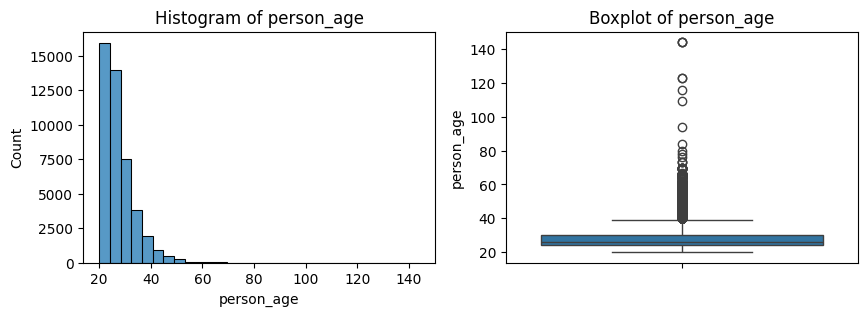

person_age - Skewness: 2.5481540050382425
person_age - Kurtosis: 18.64944898184852


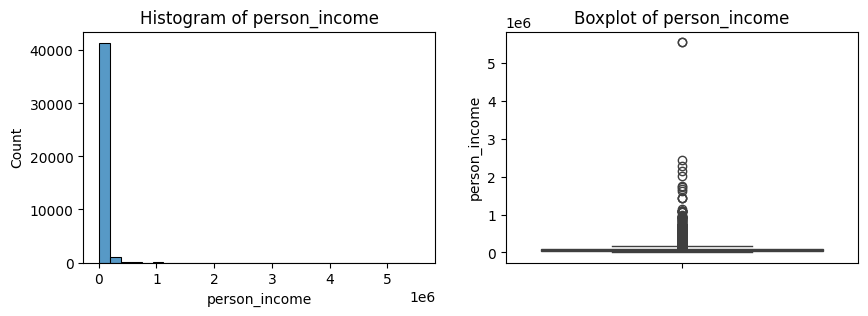

person_income - Skewness: 25.60673912825341
person_income - Kurtosis: 1569.8526113553646


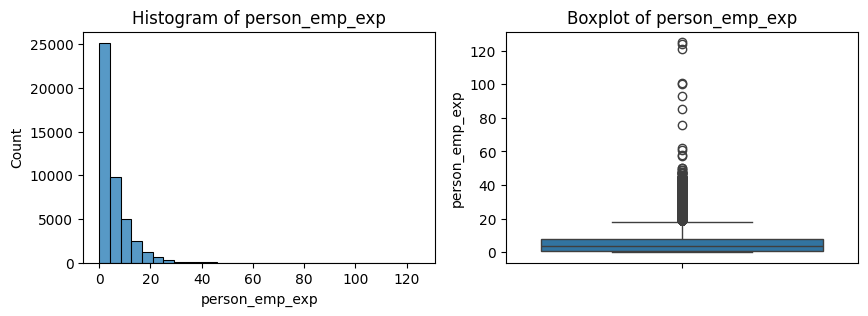

person_emp_exp - Skewness: 2.5949173726318255
person_emp_exp - Kurtosis: 19.1683237539473


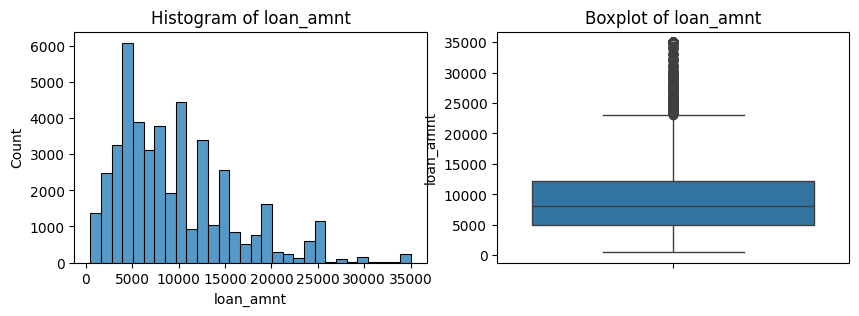

loan_amnt - Skewness: 1.1797312856279223
loan_amnt - Kurtosis: 1.3512152308228198


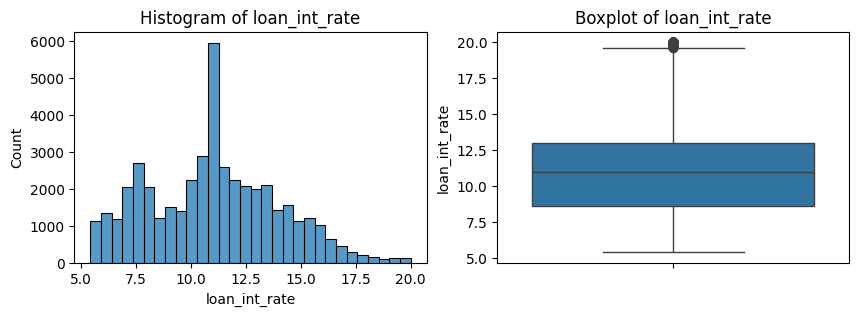

loan_int_rate - Skewness: 0.21378407238735642
loan_int_rate - Kurtosis: -0.42033530822379506


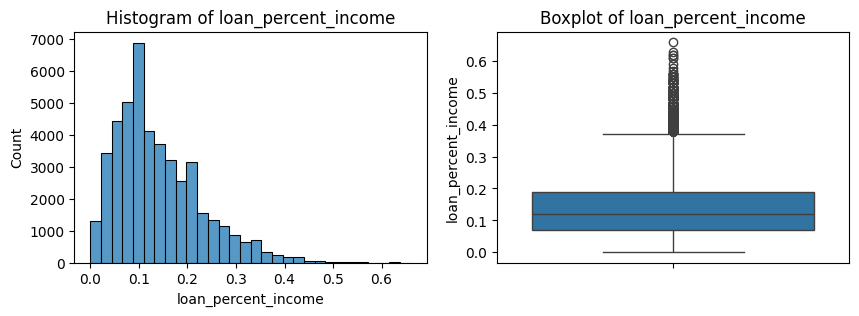

loan_percent_income - Skewness: 1.034512151182724
loan_percent_income - Kurtosis: 1.0824162412535965


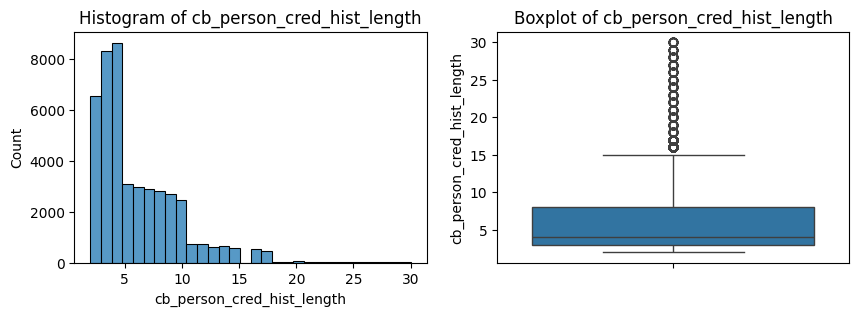

cb_person_cred_hist_length - Skewness: 1.6317199538415355
cb_person_cred_hist_length - Kurtosis: 3.725944524091197


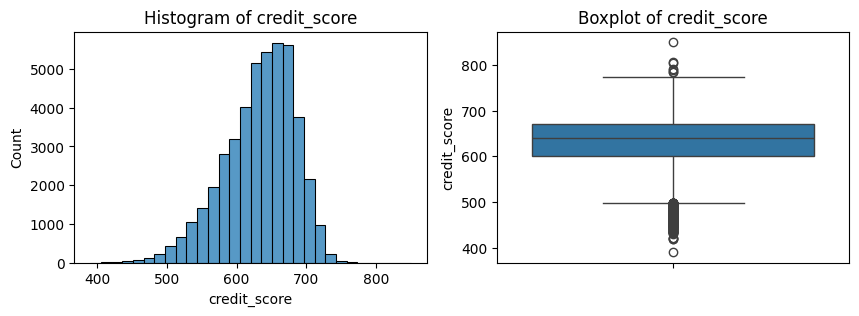

credit_score - Skewness: -0.6102608322577946
credit_score - Kurtosis: 0.20302185635702363


In [14]:
def check_distribution_outliers(dataframe, numerical):
    for col in numerical:
        plt.figure(figsize=(10, 3))

        plt.subplot(1, 2, 1)
        sns.histplot(dataframe[col], bins=30)
        plt.title(f'Histogram of {col}')

        plt.subplot(1, 2, 2)
        sns.boxplot(y=dataframe[col])
        plt.title(f'Boxplot of {col}')

        plt.show()

        print(f'{col} - Skewness: {dataframe[col].skew()}')
        print(f'{col} - Kurtosis: {dataframe[col].kurt()}')

check_distribution_outliers(df[num_cols], num_cols)

Karena data pada 'person_income' memiliki skewness lebih dari satu maka kita akan menggunakan median untuk mengisi missing value. Karena median merupakan nilai tengah yang tidak terpengaruh outlier jadi dia tetap stabil. 

In [16]:
df.isna().sum()

person_age                           0
person_gender                        0
person_education                     0
person_income                     2250
person_emp_exp                       0
person_home_ownership                0
loan_amnt                            0
loan_intent                          0
loan_int_rate                        0
loan_percent_income                  0
cb_person_cred_hist_length           0
credit_score                         0
previous_loan_defaults_on_file       0
loan_status                          0
dtype: int64

In [17]:
print('Median person_income:', np.nanmedian(x_train['person_income']))

Median person_income: 67104.0


In [18]:
x_train['person_income'].fillna(67104.0, inplace=True)
x_test['person_income'].fillna(67104.0, inplace=True)


C:\Users\win10\AppData\Local\Temp\ipykernel_14220\964042117.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train['person_income'].fillna(67104.0, inplace=True)
C:\Users\win10\AppData\Local\Temp\ipykernel_14220\964042117.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

Ubah value yang unusual di column person_gender

In [19]:
x_train['person_gender'] = x_train['person_gender'].replace('fe male', 'female')
x_train['person_gender'] = x_train['person_gender'].replace('Male', 'male')

x_test['person_gender'] = x_test['person_gender'].replace('Male', 'male')
x_test['person_gender'] = x_test['person_gender'].replace('fe male', 'female')

In [20]:
print("Training shape:", x_train.shape)
print("Training columns:", x_train.columns)


Training shape: (36000, 13)
Training columns: Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file'],
      dtype='object')


# Encoding

LabelEncoder = person_gender, previous_loan_defaults_on_file

Karena datanya terdiri dari hanya 2 value (Yes/No atau male/female) dan ga ada urutuan khusus

In [ ]:
label_gender = LabelEncoder()
label_prev = LabelEncoder()
label_gender.fit(['male', 'female'])
label_prev.fit(['Yes', 'No']) 

x_train['person_gender'] = label_gender.fit_transform(x_train['person_gender'])
x_test['person_gender'] = label_gender.transform(x_test['person_gender'])

x_train['previous_loan_defaults_on_file'] = label_prev.fit_transform(x_train['previous_loan_defaults_on_file'])
x_test['previous_loan_defaults_on_file'] = label_prev.transform(x_test['previous_loan_defaults_on_file'])

In [22]:
filename_gender = 'label_encoder_gender.pkl'
pkl.dump(label_gender, open(filename_gender, 'wb'))

filename_prev = 'label_encoder_prev.pkl'
pkl.dump(label_prev, open(filename_prev, 'wb'))

Ordinal Encoder = person_education, person_home_ownership

Untuk person_education isinya terdiri dari urutan edukasi (High School < Assosiate < Bachelor < Master < Doctorate). Pendidikan biasanya berkorelasi dengan pendapatan dan stabilitas pekerjaan. Jika semakin tinggi pendidikan maka peluang kerjanya dan gajinya semakin tinggi. Maka kemampuan membayar pinjamannya bisa lebih besar sehingga termasuk ordinal.

Untuk "person_home_ownership" diberi ordinal encoder karena ini menunjukkan tingkat kepemilikan dan potensi kestabilan finansialnya. Jika RENT maka akan masih dianggap belum memiliki aset, maka lebih dianggap beresiko oleh lembaga keuangan. Sehingga ini termasuk ordinal.

In [23]:
education_order = ['High School', 'Associate', 'Bachelor', 'Master', 'Doctorate']
ownership_order = ['OTHER', 'RENT', 'MORTGAGE', 'OWN']

ordinal_edu = OrdinalEncoder(categories=[education_order])
x_train[['person_education']] = ordinal_edu.fit_transform(x_train[['person_education']])
x_test[['person_education']] = ordinal_edu.transform(x_test[['person_education']])

ordinal_home = OrdinalEncoder(categories=[ownership_order])
x_train[['person_home_ownership']] = ordinal_home.fit_transform(x_train[['person_home_ownership']])
x_test[['person_home_ownership']] = ordinal_home.transform(x_test[['person_home_ownership']])

In [24]:
filename_edu = 'ordinal_encoder_education.pkl'
pkl.dump(ordinal_edu, open(filename_edu, 'wb'))

filename_home = 'ordinal_encoder_home.pkl'
pkl.dump(ordinal_home, open(filename_home, 'wb'))

OneHotEncoder = loan_intent

Karena tidak ada urutan yang logis atau universal di antara kategori-kategori ini. Mereka adalah jenis-jenis tujuan pinjaman yang berdiri sendiri, tanpa tingkatan yang bisa diurutkan.

In [25]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe.fit(x_train[['loan_intent']])

x_train_ohe = pd.DataFrame(ohe.transform(x_train[['loan_intent']]), 
                           columns=ohe.get_feature_names_out(['loan_intent']),
                           index=x_train.index)

x_test_ohe = pd.DataFrame(ohe.transform(x_test[['loan_intent']]), 
                          columns=ohe.get_feature_names_out(['loan_intent']),
                          index=x_test.index)

x_train = pd.concat([x_train.drop(columns=['loan_intent']), x_train_ohe.astype(int)], axis=1)
x_test = pd.concat([x_test.drop(columns=['loan_intent']), x_test_ohe.astype(int)], axis=1)

In [26]:
filename_ohe = 'ohe_encoder_loan_intent.pkl'
pkl.dump(ohe, open(filename_ohe, 'wb'))

In [27]:
x_train

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
25180,34.0,0,2.0,97265.0,11,2.0,15000.0,12.73,0.15,9.0,631,0,0,0,0,0,1,0
12555,25.0,1,0.0,67104.0,3,1.0,12000.0,11.86,0.16,4.0,659,1,0,0,0,0,0,1
29153,41.0,0,3.0,322597.0,18,2.0,24000.0,10.37,0.07,11.0,683,1,0,0,0,0,1,0
23838,27.0,1,1.0,94232.0,4,1.0,9600.0,17.14,0.10,7.0,641,0,0,1,0,0,0,0
35686,27.0,1,3.0,67104.0,7,1.0,7059.0,12.97,0.08,3.0,706,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,26.0,1,0.0,67104.0,6,2.0,10625.0,6.03,0.12,4.0,559,1,0,1,0,0,0,0
44732,25.0,0,0.0,34772.0,3,2.0,5876.0,11.69,0.17,4.0,647,0,0,0,1,0,0,0
38158,33.0,0,1.0,58317.0,9,2.0,10707.0,10.74,0.18,9.0,652,1,0,0,0,0,0,1
860,26.0,1,3.0,178602.0,6,1.0,20000.0,17.99,0.11,3.0,604,0,1,0,0,0,0,0


# Scaling

In [15]:
for i in num_cols:
    print(i, shapiro(df[i]), '\n')

person_age ShapiroResult(statistic=0.8147544952953742, pvalue=1.5359110772033097e-110) 

person_income ShapiroResult(statistic=nan, pvalue=nan) 

person_emp_exp ShapiroResult(statistic=0.7942435015054825, pvalue=2.2176717361465993e-113) 

loan_amnt ShapiroResult(statistic=0.907294328888605, pvalue=9.877108168199712e-93) 

loan_int_rate ShapiroResult(statistic=0.9832686064832863, pvalue=1.610028025349323e-55) 

loan_percent_income ShapiroResult(statistic=0.9299341346974097, pvalue=5.565532034714001e-86) 

cb_person_cred_hist_length ShapiroResult(statistic=0.8387786741320679, pvalue=7.714798393185699e-107) 

credit_score ShapiroResult(statistic=0.975596441204373, pvalue=6.90380626734642e-63) 



c:\Users\win10\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 45000.
  res = hypotest_fun_out(*samples, **kwds)


Bisa dilihat hasil dari shapiro untuk setiap column numerical memiliki p-value kurang dari 0.05. Ini berarti datanya tidak berdistribusi normal. Sehingga kita dapat menggunakan RobustScaler untuk melakukan scaling.

In [28]:
rob = RobustScaler()

x_train[num_cols] = rob.fit_transform(x_train[num_cols])
x_test[num_cols] = rob.transform(x_test[num_cols])

Karena datanya tidak berdistribusi normal, kita dapat menggunakan RobustScaler untuk scaling karena RobustScaler melakukan scaling data berdasarkan median dan interquartile range (IQR) sehingga lebih stabil pada data skewed atau tidak normal.

In [29]:
filename_scale = 'scaler.pkl'
pkl.dump(rob, open(filename_scale, 'wb'))

# RandomForest Model

In [30]:
RF_class = RandomForestClassifier(criterion= 'gini',max_depth=4)
RF_class.fit(x_train, y_train)

RandomForestClassifier(max_depth=4)

In [31]:
rf_pred = RF_class.predict(x_test)

# XGBoost

In [32]:
xg_model = xgb.XGBClassifier(random_state=42)
xg_model.fit(x_train, y_train)
xg_pred = xg_model.predict(x_test)

In [33]:
print("\n\nRANDOM FOREST")
print("Classification Report:\n", classification_report(y_test, rf_pred, zero_division=1))


print("\n\nXG BOOST")
print("Classification Report:\n", classification_report(y_test, xg_pred, zero_division=1))




RANDOM FOREST
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      6990
           1       0.93      0.60      0.73      2010

    accuracy                           0.90      9000
   macro avg       0.92      0.80      0.84      9000
weighted avg       0.91      0.90      0.89      9000



XG BOOST
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      6990
           1       0.89      0.80      0.84      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.89      0.90      9000
weighted avg       0.93      0.93      0.93      9000



Berdasarkan hasil classification report yang ditampilkan, model XGBoost menunjukkan performa yang lebih baik dibandingkan Random Forest. Meskipun Random Forest memiliki precision yang sedikit lebih tinggi untuk kelas 1 (0.93 vs 0.89), namun model ini memiliki kelemahan besar dalam hal recall, yaitu hanya 0.60, dibandingkan dengan XGBoost yang mencapai 0.80. Hal ini menunjukkan bahwa Random Forest hanya mendeteksi 60% dari orang yang layak diberi pinjaman, artinya terlalu banyak yang sebenarnya layak, tapi malah ditolak oleh model. F1-score untuk kelas 1 juga lebih tinggi pada XGBoost (0.84 dibandingkan 0.73), yang berarti keseimbangan antara precision dan recall lebih optimal pada XGBoost. Dari sisi keseluruhan performa, XGBoost juga unggul dengan accuracy 0.93, dibandingkan Random Forest yang hanya 0.90. Oleh karena itu, secara keseluruhan, XGBoost lebih unggul dan lebih direkomendasikan untuk digunakan dalam kasus ini.

In [34]:
filename = 'xg_loan.pkl'
pkl.dump(xg_model, open(filename, 'wb'))